In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.shape

(1000, 8)

3.Data Checks to perform
1) check missing values
2) check duplicates
3) check data type
4) check the number of unique values of each column
5) check statistics of dataset
6) check various categories present in different categorical column

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

In [9]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [11]:
df.info() #check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# checking number of unique values for each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights and observations
all means are very close to each other - between 66 to 69
all std are also close between 14.6 to 15.19
while there is a minimum of 0 for maths, other are having 17 and 10 value

In [16]:
# segregate numerical and categorical features
numerical_feature = [f for f in df.columns if df[f].dtype!='O']
categorical_feature = [f for f in df.columns if df[f].dtype=='O']

In [17]:
numerical_feature

['math score', 'reading score', 'writing score']

In [18]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [20]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [21]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [25]:
# aggregate total score with mean
df['total_score'] = (df['math score']+df['reading score']+df['writing score'])
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

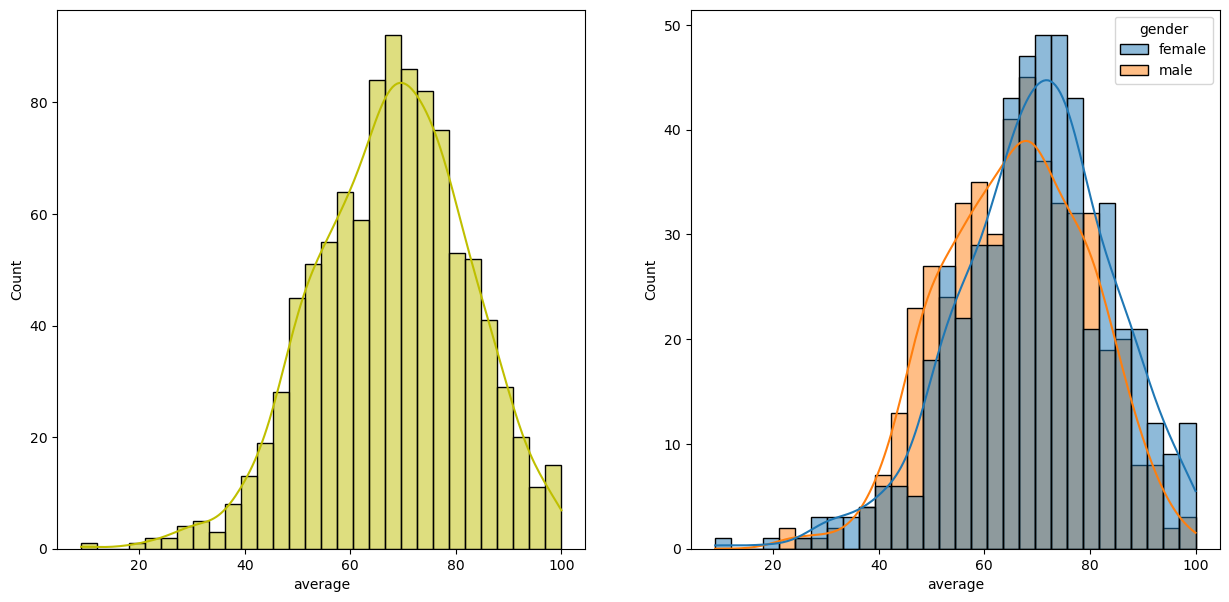

In [29]:
# explore more visualisation

fig,axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average' ,bins=30,kde = True,color='y')
plt.subplot(122)
sns.histplot(data = df,x = 'average',bins = 30,kde = True,hue='gender')

# Insight
females tends to perform better than men

<Axes: xlabel='average', ylabel='Count'>

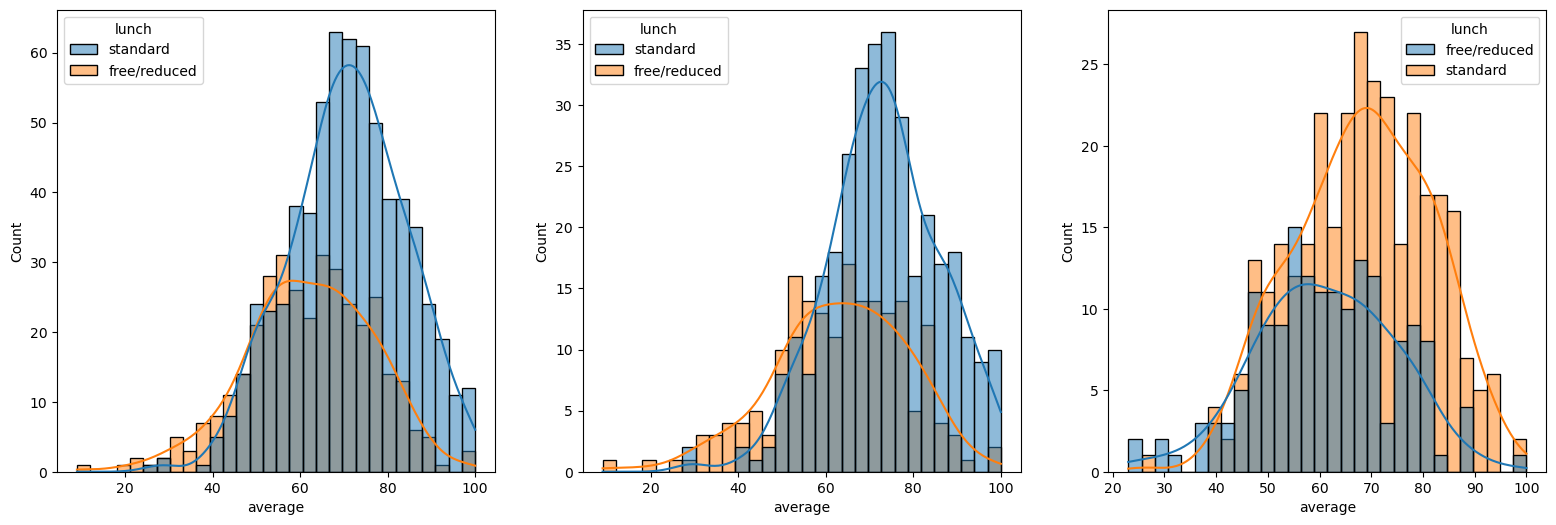

In [38]:
# explore more visualisation

fig,axis = plt.subplots(1,2,figsize = (26,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average' ,bins=30,kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],x = 'average',bins = 30,kde = True,hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' ,bins = 30,kde = True , hue = 'lunch')

#standard lunch help student perform better in exam
#standard luch help student perform better in exam be it male or female

<Axes: xlabel='average', ylabel='Count'>

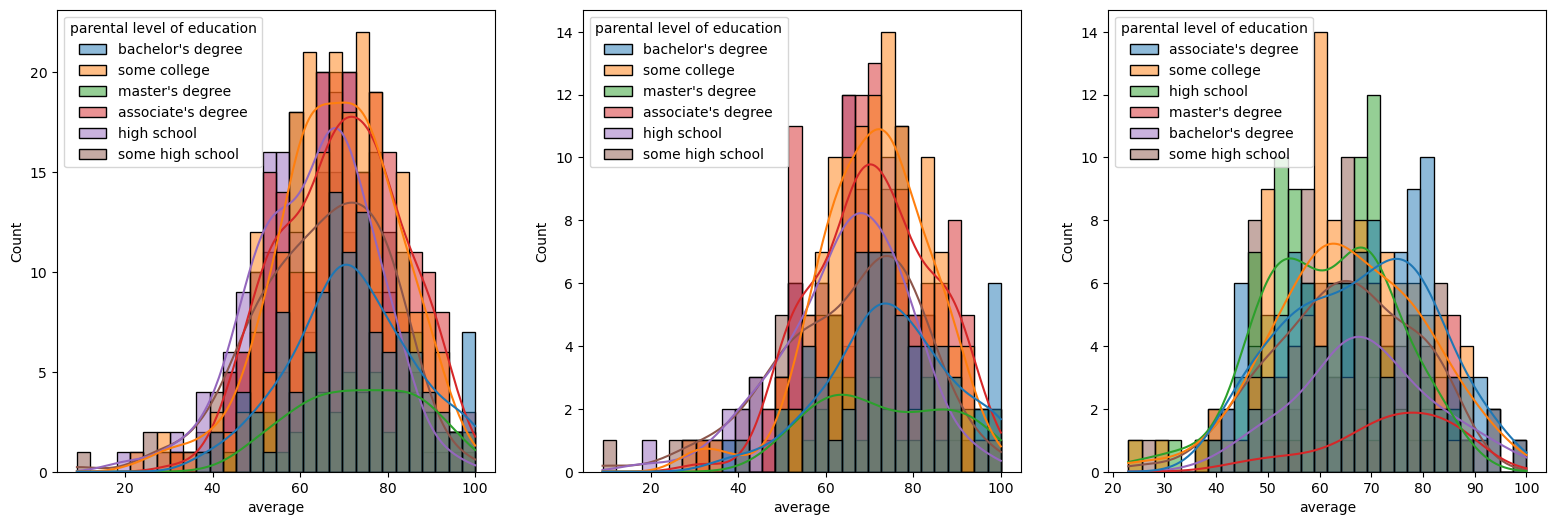

In [39]:
# explore more visualisation

fig,axis = plt.subplots(1,2,figsize = (26,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average' ,bins=30,kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],x = 'average',bins = 30,kde = True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' ,bins = 30,kde = True , hue = 'parental level of education')

in general parents education dont help student perform well in exam
2nd plot, there is no effect of parents education of female student
3rd plot the parents whose education is of associate'degree or master's degree, their male child tends to perform well in exam

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

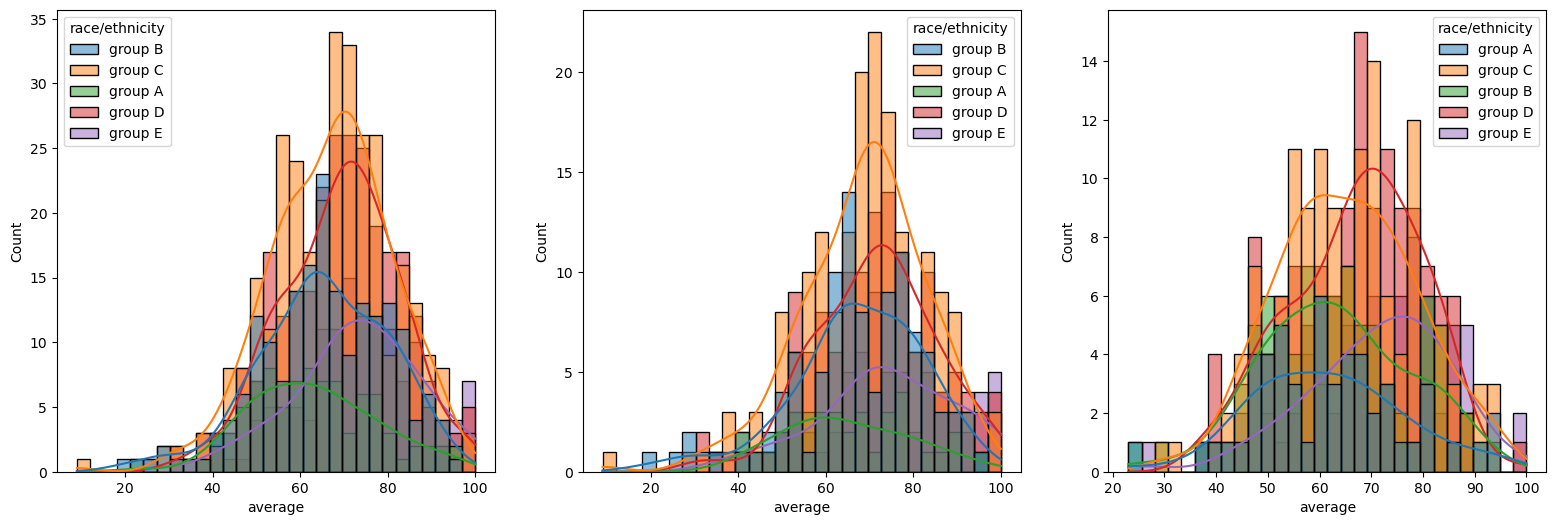

In [42]:
# explore more visualisation

fig,axis = plt.subplots(1,2,figsize = (26,6))
plt.subplot(141)
sns.histplot(data = df,x = 'average' ,bins=30,kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],x = 'average',bins = 30,kde = True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] , x = 'average' ,bins = 30,kde = True , hue = 'race/ethnicity')

# students of group a and group b tends to perfrom poor in exam
# students of group a and b tends to perfrom poor in exam irrespective of gender

<Axes: >

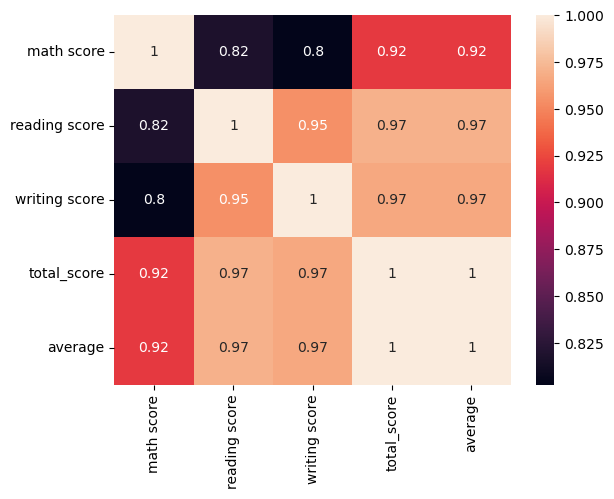

In [43]:
sns.heatmap(df.corr(),annot = True)